In [15]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

In [5]:
 data = pd.read_csv('.\eruptionData.csv', header=None)

In [18]:
len(train)

107

In [16]:
train = np.array(data[0]).reshape(-1, 1)

In [19]:
gmm = GaussianMixture(n_components=2, tol = 0.000001, max_iter = 100).fit(train)

In [22]:
np.round(gmm.weights_, 3)

array([0.738, 0.262])

In [23]:
np.round(gmm.means_, 3)

array([[4.019],
       [1.884]])

In [24]:
gmm.n_iter_

15

In [26]:
from sklearn.neighbors import KernelDensity

In [29]:
 kde = KernelDensity( kernel='gaussian',bandwidth=0.37).fit(train)

In [34]:
import matplotlib.pyplot as plt

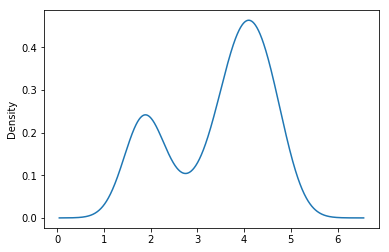

In [40]:
data[0].plot.kde()

In [41]:
gmm.score(train)

-1.0106840744671937

In [54]:
X_plot = np.linspace(0,6,1000).reshape(-1,1)

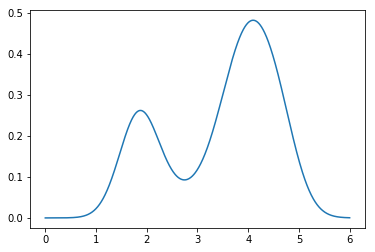

In [55]:
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot, np.exp(log_dens))

In [38]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

IndexError: index 1 is out of bounds for axis 1 with size 1

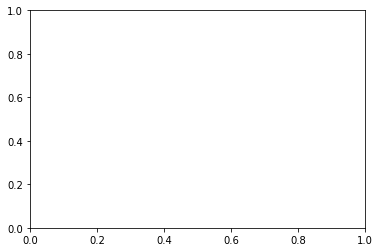

In [39]:
 plot_gmm(gmm, train)

In [56]:
from sklearn.cluster import SpectralClustering

In [ ]:
SpectralClustering(affinity = 'rbf'

In [ ]:
from scipy.spatial import distance

In [ ]:
dst = numpy.linalg.norm(a-b)

In [ ]:
points = []

In [187]:
X = np.array([[0, 0], [2, 0], [4, 0],
              [6, 0], [8, 5], [8, 3],[8, 1],[8,-1],
              [8,-3], [8,-5]])

In [64]:
aff = np.exp(- numpy.linalg.norm(X-X) ** 2/ (2 *np.var(X)))

In [120]:
gamma = 1/ (2 * 0.01)

In [121]:
aff = np.zeros([10,10])
for i in range(len(X)):
    for j in range(len(X)):
        if i != j:
            aff[i,j] = np.exp(-gamma * np.linalg.norm(X[i]-X[j])**2)
        else:
            aff[i,j] = 0

In [123]:
dgr = np.zeros([10,10])
for i in range(len(X)):
    for j in range(len(X)):
        if i==j:
            dgr[i,j] = sum(aff[i])

In [105]:
import scipy

In [124]:
dgr_2 = numpy.linalg.inv(scipy.linalg.sqrtm(dgr))

In [125]:
L = np.matmul(np.matmul(dgr_2,aff), dgr_2)

In [97]:
from scipy.linalg import eigh

In [162]:
w, v =eigh(L)

In [129]:
w

array([-1.        , -1.        , -0.80901699, -0.5       , -0.30901699,
        0.30901699,  0.5       ,  0.80901699,  1.        ,  1.        ])

In [158]:
np.matrix.transpose(v)[9]

array([0.40824829, 0.57735027, 0.57735027, 0.40824829, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [163]:
np.matrix.transpose(v)[8]

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.31622777,
       -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.31622777])

In [161]:
v

array([[ 0.        , -0.40824829,  0.        ,  0.57735027,  0.        ,
         0.        ,  0.57735027,  0.        ,  0.        ,  0.40824829],
       [ 0.        ,  0.57735027,  0.        , -0.40824829,  0.        ,
         0.        ,  0.40824829,  0.        ,  0.        ,  0.57735027],
       [ 0.        , -0.57735027,  0.        , -0.40824829,  0.        ,
         0.        , -0.40824829,  0.        ,  0.        ,  0.57735027],
       [ 0.        ,  0.40824829,  0.        ,  0.57735027,  0.        ,
         0.        , -0.57735027,  0.        ,  0.        ,  0.40824829],
       [ 0.31622777,  0.        ,  0.4472136 ,  0.        , -0.4472136 ,
         0.4472136 ,  0.        , -0.4472136 , -0.31622777,  0.        ],
       [-0.4472136 ,  0.        , -0.51166727,  0.        ,  0.19543951,
         0.19543951,  0.        , -0.51166727, -0.4472136 ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.19543951,  0.        ,  0.51166727,
        -0.51166727,  0.        , -0.19543951

In [164]:
E_v = np.array([np.matrix.transpose(v)[8],np.matrix.transpose(v)[9]])

In [166]:
E_v = np.matrix.transpose(E_v)

In [167]:
E_v

array([[ 0.        ,  0.40824829],
       [ 0.        ,  0.57735027],
       [ 0.        ,  0.57735027],
       [ 0.        ,  0.40824829],
       [-0.31622777,  0.        ],
       [-0.4472136 ,  0.        ],
       [-0.4472136 ,  0.        ],
       [-0.4472136 ,  0.        ],
       [-0.4472136 ,  0.        ],
       [-0.31622777,  0.        ]])

In [168]:
row_sums = E_v.sum(axis=1)
Y = E_v / row_sums[:, numpy.newaxis]

In [169]:
Y

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.]])

In [170]:
from sklearn.cluster import KMeans

In [186]:
km = KMeans(n_clusters=2)

In [181]:
km = km.fit(Y)

In [182]:
lb = km.predict(Y)

In [183]:
lb

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [185]:
km.inertia_/2

1.8488927466117464e-32

In [188]:
km = km.fit(X)

In [191]:
lb = km.predict(X)

In [192]:
lb

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [190]:
lb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])